In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math

In [2]:
# k-means function where k is taken as user input
# R, G and B are passed to the function as arguments

def kMeans(R,G,B,k):
    
    # 'Mean' is an array which contains all the mean values
    # 'clusters' is an array where clusters are stored in each iteration
    # 'auxillary' is an array where clusters are copied so that they can be compared in next iteration
    # 'dist' is an array which stores distance of each point from each mean
    MEANS=[]
    clusters=[]
    auxillary=[]
    dist=[]
    for Loop in range(0,k):
        MEANS.append([R[Loop],G[Loop],B[Loop]])
        clusters.append([])
        auxillary.append([])
        dist.append(0)
    
    # Creating a list of unique mean values
    Index=0
    while Index<k:
        for Loop in range(0,len(R)):
            flag=0
            check=0
            if Index==0:
                MEANS[Index]=[R[Loop],G[Loop],B[Loop]]
                Index=Index+1
            else:
                for Index in range(0,len(MEANS)):
                    if MEANS[Index]!=[R[Loop],G[Loop],B[Loop]]:
                        flag=1
                        check=Loop
            if flag==1:
                MEANS[Index]=[R[check],G[check],B[check]]
                Index=Index+1

    # Flag will stay 1 until the clusters remain same in two consecutive iterations
    # Count will be 0 only for first iteration
    Flag=1
    Count=0
    
    while Flag==1:
        Flag=0
        clusterList=[]

        # R, G and B have the same length
        for Loop in range(0,len(R)):
            # Calculate distance of point from mean and storing them in 'dist' list
            for CalDist in range(0,k):
                kMean=MEANS[CalDist]
                dx=kMean[0]-R[Loop]
                dy=kMean[1]-G[Loop]
                dz=kMean[2]-B[Loop]
                dist[CalDist]=int(math.sqrt(dx**2 + dy**2 + dz**2))
                    
            # Find minimum distance
            min=dist[0]
            clusterNo=0
            for CalDist in range(1,k):
                if dist[CalDist]<min:
                    min=dist[CalDist]
                    clusterNo=CalDist
                
            # Putting the point in the alloted cluster
            clusters[clusterNo].append([R[Loop],G[Loop],B[Loop]])
            clusterList.append(clusterNo)

        if Count==0:
            Flag=1
            Count=1
        else:
            # Checking with previous iteration's clusters
            for Index in range(0,len(clusters)):
                if(auxillary[Index]!=clusters[Index]):
                    Flag=1
           
        # Copying lists to auxillary lists   
        for Index in range(0,len(clusters)):
            auxillary[Index]=clusters[Index] 
                        
        # Finding new means
        for Index in range(0,k):
            rMean=0
            gMean=0
            bMean=0
            clustersCount=0
            clustersTemp=clusters[Index]
            for clustersIndex in range(0,len(clustersTemp)):
                clustersAdd=clustersTemp[clustersIndex]
                rMean=rMean+clustersAdd[0]              
                gMean=gMean+clustersAdd[1]
                bMean=bMean+clustersAdd[2]
                clustersCount=clustersCount+1
            rMean=rMean/clustersCount
            gMean=gMean/clustersCount
            bMean=bMean/clustersCount
            r=int(rMean)
            g=int(gMean)
            b=int(bMean)
            MEANS[Index]=[r,g,b]
            
        # Clearing the 'clusters' list
        for Loop in range(0,k):
            clusters[Loop]=[]
               
    return clusterList

In [3]:
# Taking a random data and splitting it into three lists R, G, B
wholeData=[1,6,11,2,7,12,3,8,13,4,9,14,5,10,15,16,21,26,17,222,27,18,23,28,19,24,29,20,25,30]

R=[]
G=[]
B=[]
Loop=0
while(Loop<len(wholeData)):
    R.append(wholeData[Loop])
    G.append(wholeData[Loop+1])
    B.append(wholeData[Loop+2])
    Loop=Loop+3

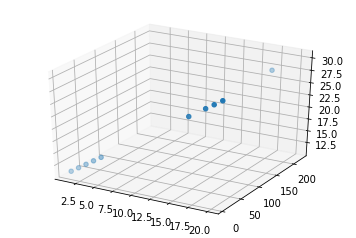

In [4]:
# Plotting R, G, B in three axes
ax = plt.axes(projection="3d")
ax.scatter3D(R, G, B);
plt.show()

In [5]:
# Taking 'k' as input
k=int(input("Enter the value of k: "))

# Calling 'k-means' function and storing the received clusters in 'clusters' list
clusterList=kMeans(R,G,B,k)

Enter the value of k: 3


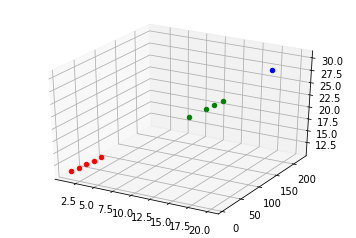

In [6]:
# Showing the clusters in different colours
# For k>10, all clusters appear black, which is a disadvantage
# More colours can be added to overcome this, as required
Loop=0
ax = plt.axes(projection="3d")

while Loop<len(clusterList):
    Index=Loop*3
    if(clusterList[Loop]==0):
        ax.scatter3D(wholeData[Index],wholeData[Index+1],wholeData[Index+2],color='red')
        
    elif(clusterList[Loop]==1):
        ax.scatter3D(wholeData[Index],wholeData[Index+1],wholeData[Index+2],color='green')
        
    elif(clusterList[Loop]==2):
        ax.scatter3D(wholeData[Index],wholeData[Index+1],wholeData[Index+2],color='blue')
        
    elif(clusterList[Loop]==3):
        ax.scatter3D(wholeData[Index],wholeData[Index+1],wholeData[Index+2],color='yellow')
        
    elif(clusterList[Loop]==4):
        ax.scatter3D(wholeData[Index],wholeData[Index+1],wholeData[Index+2],color='pink')

    elif(clusterList[Loop]==5):
        ax.scatter3D(wholeData[Index],wholeData[Index+1],wholeData[Index+2],color='orange')

    elif(clusterList[Loop]==6):
        ax.scatter3D(wholeData[Index],wholeData[Index+1],wholeData[Index+2],color='magenta')

    elif(clusterList[Loop]==7):
        ax.scatter3D(wholeData[Index],wholeData[Index+1],wholeData[Index+2],color='cyan')

    elif(clusterList[Loop]==8):
        ax.scatter3D(wholeData[Index],wholeData[Index+1],wholeData[Index+2],color='pink')

    elif(clusterList[Loop]==9):
        ax.scatter3D(wholeData[Index],wholeData[Index+1],wholeData[Index+2],color='brown')

    else:
        ax.scatter3D(wholeData[Index],wholeData[Index+1],wholeData[Index+2],color='black')
        
    Loop=Loop+1

plt.show()